In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import plotly.express as px
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from ipywidgets import interact

In [2]:
# Load olympic data in csv
athelete_df = pd.read_csv("Raw Data/athlete_events.csv")
athelete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Load country information in csv
NOC_df = pd.read_csv("Raw Data/noc_regions.csv")
NOC_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
# Merge the dataframes
athelete_merged_df = pd.merge(athelete_df,NOC_df,on='NOC',how='left')
athelete_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [5]:
# Data cleanup
athelete_merged_df['Medal'].fillna('DNW', inplace = True)
athelete_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [6]:
athelete_merged_df.replace('USA', "United States of America", inplace = True)
athelete_merged_df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
athelete_merged_df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
athelete_merged_df.replace('Congo', "Republic of the Congo", inplace = True)
athelete_merged_df.replace('Lao', "Laos", inplace = True)
athelete_merged_df.replace('Syrian Arab Republic', "Syria", inplace = True)
athelete_merged_df.replace('Serbia', "Republic of Serbia", inplace = True)
athelete_merged_df.replace('Czechia', "Czech Republic", inplace = True)
athelete_merged_df.replace('UAE', "United Arab Emirates", inplace = True)
athelete_merged_df.replace('UK', "United Kingdom", inplace = True)

In [7]:
# Function to map country to city

def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis" or col=="Lake Placid" or col=="Salt Lake City" or col=="Squaw Valley":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva" or col=="Sochi":
        return  "Russia"
    elif col == "Montreal" or col == "Calgary" or col=="Vancouver":
        return  "Canada"
    elif col == "Munich" or col == "Berlin" or col=="Garmisch-Partenkirchen":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo" or col=="Nagano" or col=="Sapporo":
        return  "Japan"
    elif col == "Roma" or col=="Cortina d'Ampezzo" or col=="Torino":
        return  "Italy"
    elif col == "Paris" or col=="Albertville" or col == "Chamonix" or col=="Grenoble":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    elif col == "Innsbruck":
        return  "Austria"
    elif col == "Lillehammer" or col=="Oslo":
        return  "Norway"
    elif col == "Sankt Moritz":
        return  "Switzerland"
    else:
        return "Other"


# Applying this function

athelete_merged_df['Host_Country'] = athelete_merged_df['City'].apply(host_country)

In [8]:
# save merged file
athelete_merged_df.to_csv('Merged_data.csv', index=False)

In [9]:
# Medal Winners for Summer games
athelete_merged_df = athelete_merged_df[(athelete_merged_df['Medal']!='DNW') & (athelete_merged_df['Season']=='Summer')]

In [10]:
athelete_merged_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,France
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,Belgium
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,Belgium
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,United Kingdom
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,United Kingdom


In [11]:
# performance of USA
USA_df = athelete_merged_df[athelete_merged_df['region'] =='United States of America']
USA_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
186,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,United States of America,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,United States of America,NaN,Greece
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,United States of America,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,United States of America,NaN,France
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,United States of America,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,United States of America,NaN,China
311,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,United States of America,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,United States of America,NaN,Greece
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,United States of America,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,United States of America,NaN,Australia


In [12]:
# USA as host
USA_host_df = athelete_merged_df[(athelete_merged_df['region'] =='United States of America') & (athelete_merged_df['Host_Country'] =='United States of America')]
USA_host_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
711,404,"Louis Grenville ""Lou"" Abell",M,19.0,NaN,NaN,Vesper Boat Club,United States of America,1904 Summer,1904,Summer,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold,United States of America,NaN,United States of America
787,454,"Edgar Allen ""Ed"" Ablowich",M,19.0,182.0,68.0,United States,United States of America,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,Gold,United States of America,NaN,United States of America
1462,813,Edgar Holmes Adams,M,36.0,NaN,NaN,United States,United States of America,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's Plunge For Distance,Silver,United States of America,NaN,United States of America
1728,963,Derrick Ralph Adkins,M,26.0,188.0,80.0,United States,United States of America,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Gold,United States of America,NaN,United States of America
2031,1122,Andre Kirk Agassi,M,26.0,180.0,80.0,United States,United States of America,1996 Summer,1996,Summer,Atlanta,Tennis,Tennis Men's Singles,Gold,United States of America,NaN,United States of America


In [13]:
medals_per_year = athelete_merged_df.groupby('Year')['Year'].value_counts().reset_index()
medals_per_year.head()

,Year,count
0,1896,143
1,1900,604
2,1904,486
3,1906,458
4,1908,831


In [14]:
USA_medals_per_year = USA_df.groupby('Year')['Year'].value_counts().reset_index()
USA_medals_per_year.head()

,Year,count
0,1896,20
1,1900,63
2,1904,394
3,1906,24
4,1908,65


In [15]:
USA_medals_per_year_host = USA_host_df.groupby('Year')['Year'].value_counts().reset_index()
USA_medals_per_year_host.head()

,Year,count
0,1904,394
1,1932,189
2,1984,352
3,1996,259


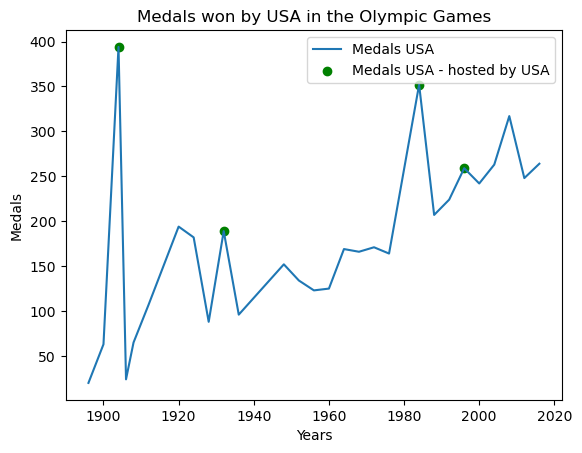

In [16]:
# Sort dataframes
USA_sorted_df = USA_df.sort_values(by='Year')
# Plot for Medals by Years
#plt.bar(medals_per_year['Year'], medals_per_year['count'],  label='Total Medals')
plt.plot(USA_medals_per_year['Year'], USA_medals_per_year['count'], label='Medals USA')
plt.scatter(USA_medals_per_year_host['Year'], USA_medals_per_year_host['count'], c='g', label='Medals USA - hosted by USA')
# Title and Axis
plt.title('Medals won by USA in the Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

In [17]:
host_country_df = athelete_merged_df.groupby(['Host_Country','Year','region'])['Medal'].count().reset_index(name='Medal_Count')
host_country_df.head(5)

,Host_Country,Year,region,Medal_Count
0,Australia,1956,Argentina,2
1,Australia,1956,Australia,67
2,Australia,1956,Austria,4
3,Australia,1956,Bahamas,2
4,Australia,1956,Belgium,2


In [18]:
host_country_medals_df = host_country_df[host_country_df['Host_Country']==host_country_df['region']]

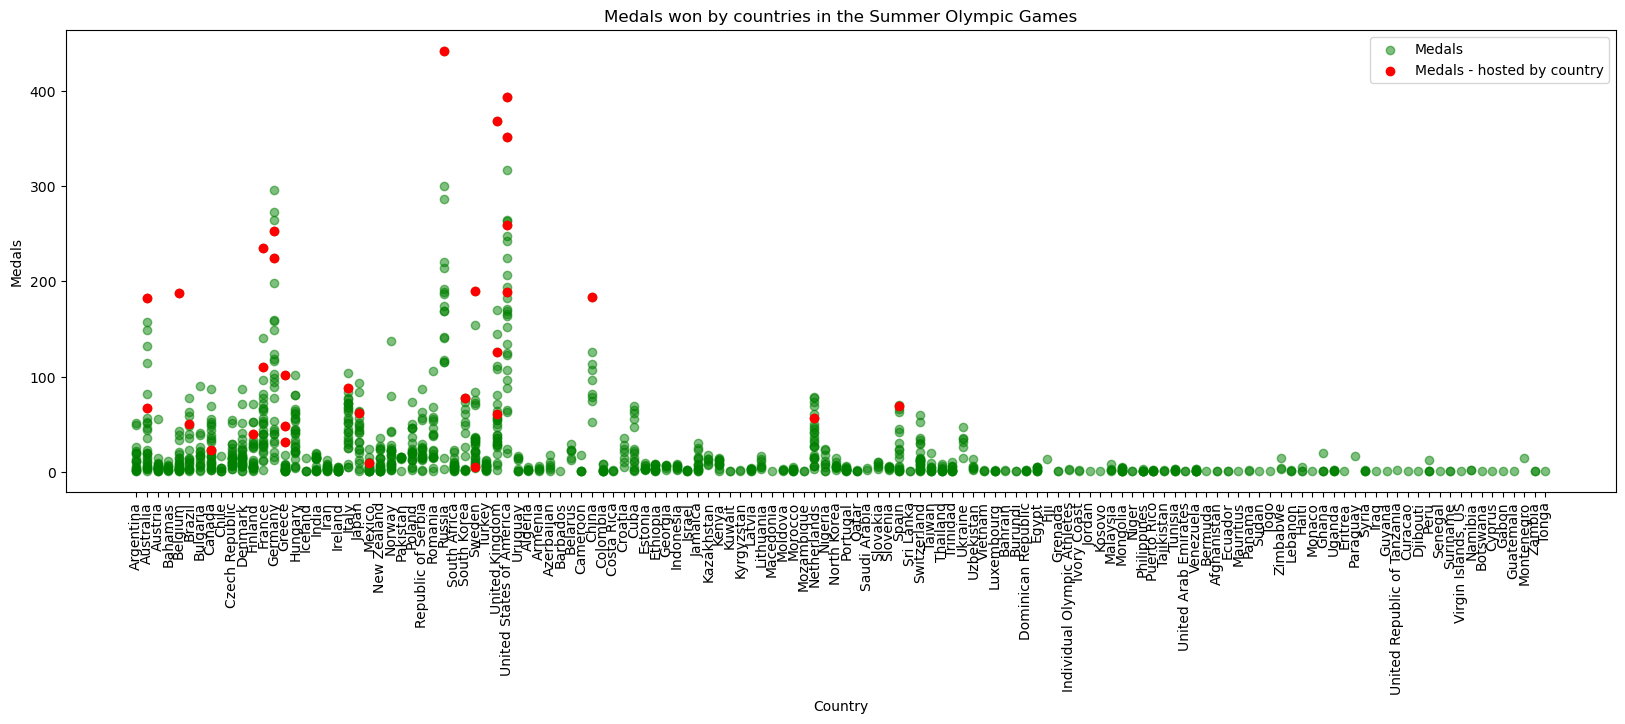

In [19]:
plt.figure(figsize=(20, 6))
plt.scatter(host_country_df['region'], host_country_df['Medal_Count'], c='g',alpha=0.5, label='Medals')
plt.scatter(host_country_medals_df['region'], host_country_medals_df['Medal_Count'], c='r',alpha=1.0, label='Medals - hosted by country')
plt.title('Medals won by countries in the Summer Olympic Games')
plt.xlabel('Country')
plt.ylabel('Medals')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [20]:
athelete_merged_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,France
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,Belgium


In [29]:
df = athelete_merged_df[athelete_merged_df['Medal']=='Gold']
df2 = df.groupby(['region'])['Medal'].count().reset_index(name='Gold Count')
df2

,region,Gold Count
0,Algeria,5
1,Argentina,91
2,Armenia,2
3,Australia,362
4,Austria,29
...,...,...
92,Uruguay,31
93,Uzbekistan,9
94,Venezuela,2
95,Vietnam,1


In [33]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_data = world.merge(df2, how='right', left_on='name', right_on='region')

fig = px.choropleth(world_data, 
                     locations='iso_a3', 
                     color='Gold Count',
                     hover_name='region', 
                     projection='natural earth')

# Update hover information
fig.update_traces(hoverinfo='all', 
                  hovertemplate='Country: %{hovertext}<br>Data: %{customdata[0]}',
                  customdata=world_data[['Gold Count']])

# Show the plot
fig.update_layout(height=600, width=800)
fig.show()

C:\Users\soumy\AppData\Local\Temp\ipykernel_38576\2323727376.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

